In [1]:
#Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sns.set(rc = {'figure.figsize':(15,8)})

%matplotlib inline

**Step 1:** Loading relevant packages for analysis: Pandas,  sklearn, matplotlib ect..

**Question Brief:** Cluster this data into a reasonable number of 
clusters, look at the members of the clusters and write 
a description for each cluster. Also add 2 lines about 
strategy to market personal grooming product to each 
cluster. 

In [2]:
groom = pd.read_csv("C:/Users/j.alexander1/Desktop/PYTHON/GeneralAssembly/CLASS MATERIALS/14 Materials-Project3/data/Personal_Grooming.csv")

In [3]:
groom.head()

,SLNO,EDU,OCC,M_STAT,A1_01,A1_02,A1_03,A1_04,A1_05,A1_06,...,A1_12,A1_13,A1_14,A1_15,A1_16,A1_17,A1_18,A1_19,A1_20,A1_21
0,101023,6.0,1.0,2.0,5.0,3.0,4.0,5.0,3.0,4.0,...,5.0,5.0,4.0,5.0,1.0,4.0,3.0,5.0,4.0,4.0
1,101024,5.0,5.0,1.0,5.0,4.0,3.0,3.0,4.0,5.0,...,4.0,4.0,5.0,5.0,1.0,3.0,3.0,5.0,4.0,5.0
2,101025,6.0,3.0,2.0,5.0,3.0,4.0,3.0,3.0,4.0,...,5.0,4.0,5.0,1.0,4.0,3.0,4.0,5.0,4.0,4.0
3,101026,5.0,1.0,2.0,5.0,3.0,5.0,4.0,3.0,5.0,...,4.0,5.0,5.0,4.0,2.0,4.0,3.0,5.0,4.0,4.0
4,101027,7.0,3.0,1.0,5.0,3.0,4.0,5.0,3.0,5.0,...,5.0,4.0,5.0,5.0,1.0,3.0,3.0,4.0,5.0,5.0


**Step 2:** Load data and asses data types, size of dataset and if any null values present.

In [4]:
groom.isnull().values.any()

False

**DATA DICTIONARY**

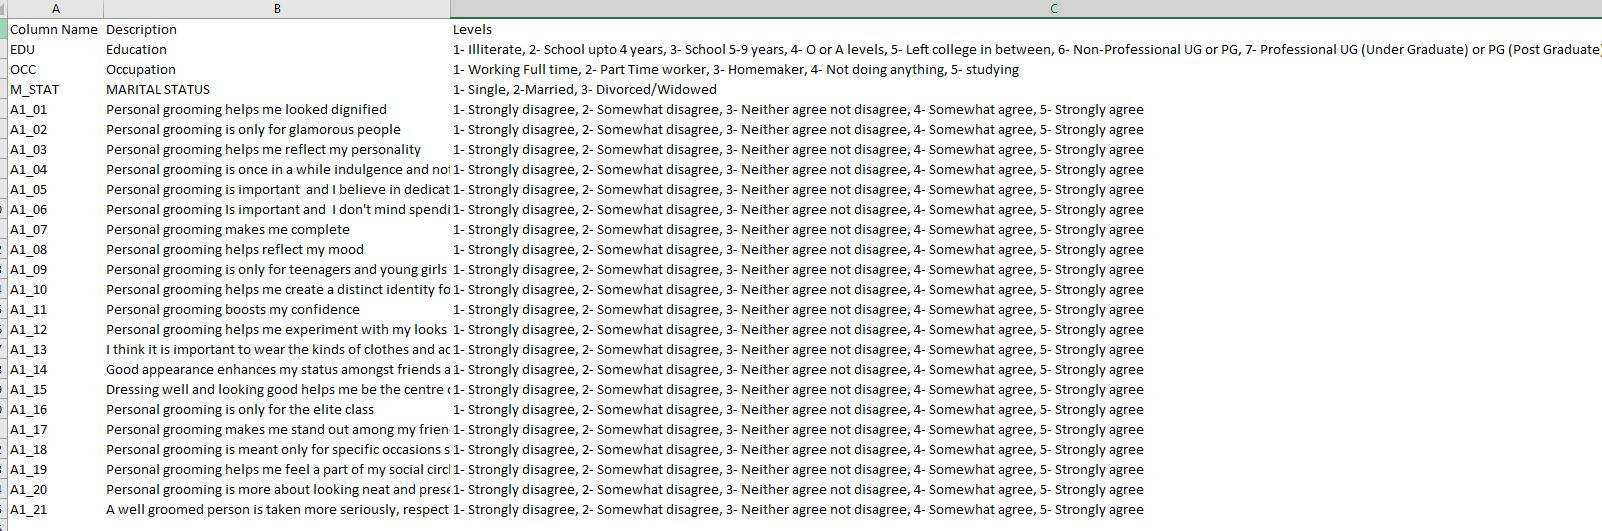

In [5]:
groom.dtypes

SLNO        int64
EDU       float64
OCC       float64
M_STAT    float64
A1_01     float64
A1_02     float64
A1_03     float64
A1_04     float64
A1_05     float64
A1_06     float64
A1_07     float64
A1_08     float64
A1_09     float64
A1_10     float64
A1_11     float64
A1_12     float64
A1_13     float64
A1_14     float64
A1_15     float64
A1_16     float64
A1_17     float64
A1_18     float64
A1_19     float64
A1_20     float64
A1_21     float64
dtype: object

In [6]:
groom.shape

(3499, 25)

In [7]:
groom = groom.drop_duplicates(subset='SLNO',keep='first')

**Step 3:** 25 columns is a lot of variables to be considered in the analysis. Examining the data to see if dimensions can be consolidated down into a smaller 'key' areas to simplfy the dataset. After reviewing the data dictionary we have 3 economic factors (Education level, Occupation, Marital Status). 

And, upon reviewing the survery data, there are four 'camps' the questions generally fall into:

* Personal grooming as a expression of personality (e.g. 'Personal grooming makes me complete') represented by [A1_03,A1_07,A1_08,A1_10,A1_11]

* Frequency and time deciated to personal grooming (e.g. 'Personal grooming is important  and I believe in dedicating time specifically for it') represented by [A1_18,A1_04,A1_05,A1_06]

* Personal grooming and personal aesthetic/style (e.g. 'Personal grooming helps me experiment with my looks') represented by [A1_12,A1_13,A1_20,A1_01]

* Personal grooming and social status (e.g. 'Good appearance enhances my status amongst friends and colleagues') represented by [A1_02,A1_16,A1_09,A1_14,A1_15,A1_17,A1_19,A1_21]

Therefore will conduct dimensionality reduction to improve the model and ease of interpretation. 


**Step 4:** Taking two question from each of the four 'camps' above, and taking an average of their score (ensuring the sentiment of the questions skew in the same direction i.e. for grooming and frequency A1_18 & A1_04 sentiment make sense 1-5, but A1_18 & A1_05 have sentiment going in opposite ways 1-5)

In [8]:
groom_personality = groom[["A1_03", "A1_07"]].mean(axis=1)
groom_personality

0       4.5
1       3.5
2       4.5
3       4.5
4       4.5
       ... 
3492    4.0
3493    5.0
3494    3.5
3495    3.5
3496    4.0
Length: 1867, dtype: float64

In [9]:
groom_frequency = groom[["A1_05", "A1_06"]].mean(axis=1)
groom_frequency

0       3.5
1       4.5
2       3.5
3       4.0
4       4.0
       ... 
3492    4.5
3493    4.5
3494    4.0
3495    4.5
3496    5.0
Length: 1867, dtype: float64

In [10]:
groom_aesthetic = groom[["A1_12", "A1_13"]].mean(axis=1)
groom_aesthetic

0       5.0
1       4.0
2       4.5
3       4.5
4       4.5
       ... 
3492    4.5
3493    5.0
3494    3.5
3495    3.5
3496    4.5
Length: 1867, dtype: float64

In [11]:
groom_status = groom[["A1_14", "A1_15"]].mean(axis=1)
groom_status

0       4.5
1       5.0
2       3.0
3       4.5
4       5.0
       ... 
3492    4.5
3493    4.5
3494    5.0
3495    4.0
3496    4.5
Length: 1867, dtype: float64

**Step 3:** On economic factors, we also want to simplify down further:

* EDU to Highly Educated (Data Point = 3) [6 & 7], Educated (Data Point = 2) [3,4,5], Uneducated (Data Point = 1) [1,2]
* OCC to Working (Data Point = 2) [1&2], Not Working (Data Point = 1) [3,4,5]
* M_STAT to Married (Data Point = 2) [2] Unmarried (Data Point = 1) [1 & 3]

In [12]:
education = groom['EDU'].replace([1,2,3,4,5,6,7],[1,1,2,2,2,3,3])
education



0       3.0
1       2.0
2       3.0
3       2.0
4       3.0
       ... 
3492    3.0
3493    2.0
3494    3.0
3495    2.0
3496    3.0
Name: EDU, Length: 1867, dtype: float64

**Step 5:** Same process of simplify the economic features 'Education, Occupation, Marital Status'

 # Education
 3 = Highly educated
 2 = Educated
 1 = Uneducated
 
 _Dropped education from the second version, as Occupation acts as a decent proxy for the same thing (economic surplus), and may be interfering with model._

In [13]:
occupation = groom['OCC'].replace([1,2,3,4,5],[2,2,1,1,1])
occupation

0       2.0
1       1.0
2       1.0
3       2.0
4       1.0
       ... 
3492    1.0
3493    1.0
3494    1.0
3495    1.0
3496    2.0
Name: OCC, Length: 1867, dtype: float64

 # Occupation
 2 = Working
 1 = Not Working

In [14]:
m_status = groom['M_STAT'].replace([1,2,3],[1,2,1])

 # Marital Status
 2 = Married
 1 = Not Married

**Step 4:** Bringing together the varaious dataframes

In [15]:
groom_new =  pd.concat([groom_personality, groom_frequency, groom_aesthetic, groom_status,  m_status, education], ignore_index=False, axis=1)
groom_new

,0,1,2,3,M_STAT,EDU
0,4.5,3.5,5.0,4.5,2.0,3.0
1,3.5,4.5,4.0,5.0,1.0,2.0
2,4.5,3.5,4.5,3.0,2.0,3.0
3,4.5,4.0,4.5,4.5,2.0,2.0
4,4.5,4.0,4.5,5.0,1.0,3.0
...,...,...,...,...,...,...
3492,4.0,4.5,4.5,4.5,1.0,3.0
3493,5.0,4.5,5.0,4.5,1.0,2.0
3494,3.5,4.0,3.5,5.0,2.0,3.0
3495,3.5,4.5,3.5,4.0,2.0,2.0


**Step 6:** Rename Columns

In [16]:
groom_new = groom_new.rename(columns={"0":"groom_personality", "1":"groom_frequency", "2":"groom_aesthetic", "3":"groom_status"})

In [17]:
X = groom_new
X

,0,1,2,3,M_STAT,EDU
0,4.5,3.5,5.0,4.5,2.0,3.0
1,3.5,4.5,4.0,5.0,1.0,2.0
2,4.5,3.5,4.5,3.0,2.0,3.0
3,4.5,4.0,4.5,4.5,2.0,2.0
4,4.5,4.0,4.5,5.0,1.0,3.0
...,...,...,...,...,...,...
3492,4.0,4.5,4.5,4.5,1.0,3.0
3493,5.0,4.5,5.0,4.5,1.0,2.0
3494,3.5,4.0,3.5,5.0,2.0,3.0
3495,3.5,4.5,3.5,4.0,2.0,2.0


**Step 7:** Data needs to be scaled as some values range 1-5, others 1-2

In [18]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

**Step 8:** Decided on k=3, see graph below for reasoning

In [19]:
# instantiate the model with 3 clusters
km = KMeans(n_clusters=3, random_state=1)

#fit the model
km.fit(X_scaled)

KMeans(n_clusters=3, random_state=1)

In [20]:
km.labels_

array([0, 2, 0, ..., 0, 0, 2])

**Step 9:** Assign 'cluster' as a new column

In [21]:
groom_new["cluster"] = km.labels_
groom_new

,0,1,2,3,M_STAT,EDU,cluster
0,4.5,3.5,5.0,4.5,2.0,3.0,0
1,3.5,4.5,4.0,5.0,1.0,2.0,2
2,4.5,3.5,4.5,3.0,2.0,3.0,0
3,4.5,4.0,4.5,4.5,2.0,2.0,0
4,4.5,4.0,4.5,5.0,1.0,3.0,2
...,...,...,...,...,...,...,...
3492,4.0,4.5,4.5,4.5,1.0,3.0,2
3493,5.0,4.5,5.0,4.5,1.0,2.0,2
3494,3.5,4.0,3.5,5.0,2.0,3.0,0
3495,3.5,4.5,3.5,4.0,2.0,2.0,0


In [22]:
groom_new['cluster'].value_counts()

0    1075
2     455
1     337
Name: cluster, dtype: int64

In [23]:
km.cluster_centers_

array([[ 0.26569099,  0.26782728,  0.32507859,  0.30737427,  0.63957533,
        -0.02436899],
       [-1.23611582, -1.21921091, -1.39027922, -1.30126949,  0.0708192 ,
        -0.0811249 ],
       [ 0.28780927,  0.27024122,  0.26168048,  0.23758347, -1.56353748,
         0.117661  ]])

In [24]:
groom_new.mean()

0          4.194697
1          4.137386
2          4.124799
3          4.202196
M_STAT     1.709695
EDU        2.721478
cluster    0.667916
dtype: float64

**Step 10:** Present clusters on a heatmap / review means

Text(0.5, 1.0, 'Mean for each feature by each cluster')

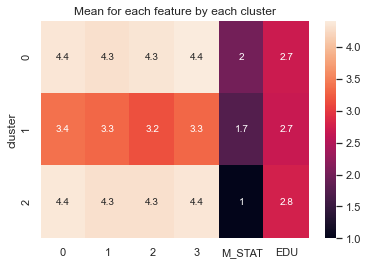

In [25]:
sns.heatmap(groom_new.groupby(["cluster"]).mean(), annot = True)
plt.title("Mean for each feature by each cluster")

In [26]:
centers = groom_new.groupby(["cluster"]).mean()
centers

,0,1,2,3,M_STAT,EDU
cluster,,,,,,
0,4.366977,4.314884,4.347907,4.409767,2.00000,2.709767
1,3.393175,3.329377,3.170623,3.323442,1.74184,2.682493
2,4.381319,4.316484,4.304396,4.362637,1.00000,2.778022


# Findings

Cluster 1 (0) Married, Education level on parity with other clusters, High scoring across all features (Personality, Frequency, Aesthetic, Status) therefore already an avid consumer of PG products. Target higher margin/value products, with more 'premium' looking advertising, including products which may take more time to use, but come with a greater status/social benefit. Consumer more likely to respond to social status focused goods.       

Cluster 2 (1) Married, Education level on parity with other clusters, (Personality, Frequency, Aesthetic, Status) may therefore be consuming less PG than cluster 1. Target with a introductionary discount campaign for 'quick and easy' grooming products. Lower cost barrier to incentivise more purshasing, with products designed to take less time to apply. <br>


Cluster 3 (2) Unmarried, Education level on parity with other clusters, High scoring across all features (Personality, Frequency, Aesthetic, Status). Unmarried status may mean personal living costs are potentially higher, but consumer still prefers to spend time / money on grooming products. Therefore, initiat a loyalty club, offering progressive discounts overtime for repeat purchasing of prpducts. Help address price sensitivity and rewards loyalty. <br>



 **Bonus: Using the elbow plot technique to validate the correct number of 'K' for K Means...**

In [27]:
k_rng = range(1,10)
sse = []

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(groom_new)
    sse.append(km.inertia_)

C:\Users\j.alexander1\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


In [28]:
sse

[5475.762185324061,
 3740.9646840498062,
 2603.415269106012,
 2365.610290056667,
 2185.437851801205,
 2012.5185792166,
 1902.0434849760393,
 1798.839242072962,
 1718.0634680213143]

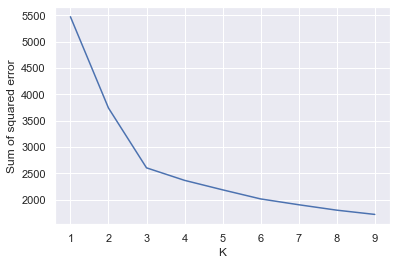

In [29]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

# Version 2
* Trying this again without filter the results, and therefore using all 25 columns...

In [30]:
groom_two = pd.read_csv("C:/Users/j.alexander1/Desktop/PYTHON/GeneralAssembly/CLASS MATERIALS/14 Materials-Project3/data/Personal_Grooming.csv")

In [31]:
groom_two = groom_two.drop_duplicates(subset='SLNO',keep='first')

In [32]:
groom_two = groom_two.drop(['SLNO'],axis='columns')

In [33]:
Z = groom_two

In [34]:
scaler = StandardScaler()

Z_scaled = scaler.fit_transform(Z)

km = KMeans(n_clusters=3, random_state=1)

km.fit(Z_scaled)

KMeans(n_clusters=3, random_state=1)

In [35]:
km.labels_

array([2, 2, 2, ..., 0, 0, 0])

In [36]:
groom_two["cluster"] = km.labels_
groom_two

,EDU,OCC,M_STAT,A1_01,A1_02,A1_03,A1_04,A1_05,A1_06,A1_07,...,A1_13,A1_14,A1_15,A1_16,A1_17,A1_18,A1_19,A1_20,A1_21,cluster
0,6.0,1.0,2.0,5.0,3.0,4.0,5.0,3.0,4.0,5.0,...,5.0,4.0,5.0,1.0,4.0,3.0,5.0,4.0,4.0,2
1,5.0,5.0,1.0,5.0,4.0,3.0,3.0,4.0,5.0,4.0,...,4.0,5.0,5.0,1.0,3.0,3.0,5.0,4.0,5.0,2
2,6.0,3.0,2.0,5.0,3.0,4.0,3.0,3.0,4.0,5.0,...,4.0,5.0,1.0,4.0,3.0,4.0,5.0,4.0,4.0,2
3,5.0,1.0,2.0,5.0,3.0,5.0,4.0,3.0,5.0,4.0,...,5.0,5.0,4.0,2.0,4.0,3.0,5.0,4.0,4.0,2
4,7.0,3.0,1.0,5.0,3.0,4.0,5.0,3.0,5.0,5.0,...,4.0,5.0,5.0,1.0,3.0,3.0,4.0,5.0,5.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3492,6.0,4.0,1.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,...,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,0
3493,4.0,4.0,1.0,4.0,5.0,5.0,4.0,4.0,5.0,5.0,...,5.0,4.0,5.0,5.0,4.0,4.0,4.0,5.0,5.0,0
3494,6.0,3.0,2.0,5.0,5.0,4.0,3.0,4.0,4.0,3.0,...,3.0,5.0,5.0,4.0,3.0,4.0,4.0,3.0,4.0,0
3495,5.0,3.0,2.0,5.0,4.0,4.0,4.0,5.0,4.0,3.0,...,3.0,4.0,4.0,5.0,4.0,4.0,3.0,4.0,5.0,0


In [37]:
groom_two['cluster'].value_counts()

0    1201
1     389
2     277
Name: cluster, dtype: int64

In [38]:
km.cluster_centers_

array([[-0.03753393, -0.01184045, -0.01894709,  0.29742534,  0.48243921,
         0.17173263,  0.31823402,  0.24761904,  0.24338886,  0.15417671,
         0.31535219,  0.50054792,  0.26594168,  0.18487559,  0.30647038,
         0.2203624 ,  0.26518701,  0.24553334,  0.51538665,  0.29667221,
         0.30512925,  0.26660317,  0.28517471,  0.31068338],
       [ 0.02844132,  0.01352552, -0.01479823, -1.19469029, -0.82423715,
        -0.88166049, -0.58984758, -0.95283307, -0.78545124, -0.84042691,
        -0.69892713, -0.59944664, -0.87757725, -0.94070705, -0.89262268,
        -0.98373302, -1.07513745, -0.88957717, -0.63987877, -0.93245303,
        -0.8151109 , -1.01097532, -1.16288428, -1.13745422],
       [ 0.1227963 ,  0.03234277,  0.10293129,  0.388183  , -0.93422831,
         0.49355609, -0.5514381 ,  0.26448229,  0.0477636 ,  0.51176839,
        -0.3857593 , -1.32842349,  0.07935592,  0.51949263, -0.0752372 ,
         0.42605381,  0.36006811,  0.18469305, -1.33598023,  0.02318015,
  

In [39]:
groom_two.mean()

EDU        5.670595
OCC        2.616497
M_STAT     1.721478
A1_01      4.389930
A1_02      3.693626
A1_03      4.185324
A1_04      3.950723
A1_05      4.166042
A1_06      4.108731
A1_07      4.204071
A1_08      3.991430
A1_09      3.534012
A1_10      4.071773
A1_11      4.175147
A1_12      4.071773
A1_13      4.177825
A1_14      4.242635
A1_15      4.161757
A1_16      3.675951
A1_17      3.979111
A1_18      4.004285
A1_19      4.104981
A1_20      4.151580
A1_21      4.053026
cluster    0.505088
dtype: float64

Text(0.5, 1.0, 'Mean for each feature by each cluster')

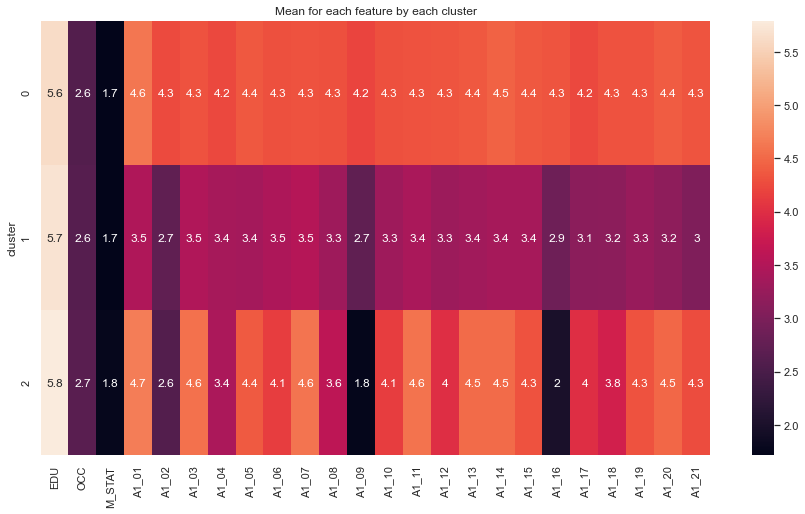

In [40]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(groom_two.groupby(["cluster"]).mean(), annot = True)
plt.title("Mean for each feature by each cluster")

Key for Cluster 2 
* A1_02: 'Personal grooming is only for glamorous people' 2 = 'Somewhat Disagree'
* A1_04: 'Personal grooming is once in a while indulgence and not a day to day activity' 3 = 'Neither Agree nor disagree'
* A1_08: 'Personal grooming helps reflect my mood' 3 = 'Neither Agree nor disagree'
* A1_09: 'Personal grooming is only for teenagers and young girls' 1 = 'Strongly Disagree'
* A1_16: 'Personal grooming is only for the elite class' 2 = 'Somewhat Disagree'


# Findings

**Cluster 1 (0)** Marrital status, Education level and occupation on parity with other clusters. Interestingly, clusters 1&2 are largely seperated based on overall affinity for personal grooming. Cluster '0' might have potential bias if people simply responded 4/5 to each question (hence explaining the consitency...). However, if genuine results same recommendation as before:
*Target higher margin/value products, with more 'premium' looking advertising, including products which may take more time to use, but come with a greater status/social benefit. Consumer more likely to respond to social status focused goods.*

**Cluster 2 (1)** Marrital status, Education level and occupation on parity with other clusters. Same figures largely as before.... therefore same recommendation: *Target with a introductionary discount campaign for 'quick and easy' grooming products. Lower cost barrier to incentivise more purshasing, with products designed to take less time to apply.*

**Cluster 3 (2)** Marrital status, Education level and occupation on parity with other clusters. More interesting result on individual areas here. Largely similar to cluster 1, however significant variance on specific questions, which somewhat mirrors cluster 2. Main drawdowns are in: 
* A1_09 *'Personal grooming is only for teenagers and young girls' 1 = 'Strongly Disagree'*
* A1_16 *'Personal grooming is only for the elite class' 2 = 'Somewhat Disagree'*

Given in a way, these questions are actually **postive** in terms of sentiment to  personal grooming, despite being a 'lower' score: this cluster may be more representative of **true** consumer thought, (ather than cluster 1, who I supster simply pressed 4/5 throughout the questionaire). In terms of strategy, would suggest same as before: 
*Target higher margin/value products, with more 'premium' looking advertising, including products which may take more time to use, but come with a greater status/social benefit. Consumer more likely to respond to social status focused goods.*

However, clearly more examination/cleaning of the data needed here, to explore potential bias!

In [41]:
centers = groom_two.groupby(["cluster"]).mean()
centers

,EDU,OCC,M_STAT,A1_01,A1_02,A1_03,A1_04,A1_05,A1_06,A1_07,...,A1_12,A1_13,A1_14,A1_15,A1_16,A1_17,A1_18,A1_19,A1_20,A1_21
cluster,,,,,,,,,,,,,,,,,,,,,
0,5.632806,2.600333,1.712739,4.619484,4.260616,4.320566,4.247294,4.368859,4.308909,4.326395,...,4.334721,4.362198,4.452123,4.373855,4.328060,4.246461,4.320566,4.327227,4.393006,4.332223
1,5.699229,2.634961,1.714653,3.467866,2.724936,3.491003,3.401028,3.385604,3.462725,3.537275,...,3.305913,3.354756,3.393316,3.393316,2.866324,3.138817,3.159383,3.262211,3.167095,3.030848
2,5.794224,2.660650,1.768953,4.689531,2.595668,4.574007,3.436823,4.382671,4.148014,4.610108,...,4.007220,4.534296,4.527076,4.321300,1.985560,4.000000,3.819495,4.324910,4.487365,4.277978


# Findings

* Cluster 1 (0)
* Cluster 2 (1)
* Cluster 3 (2)